# **Извлечение признаков**

# Архитектура систем классификации

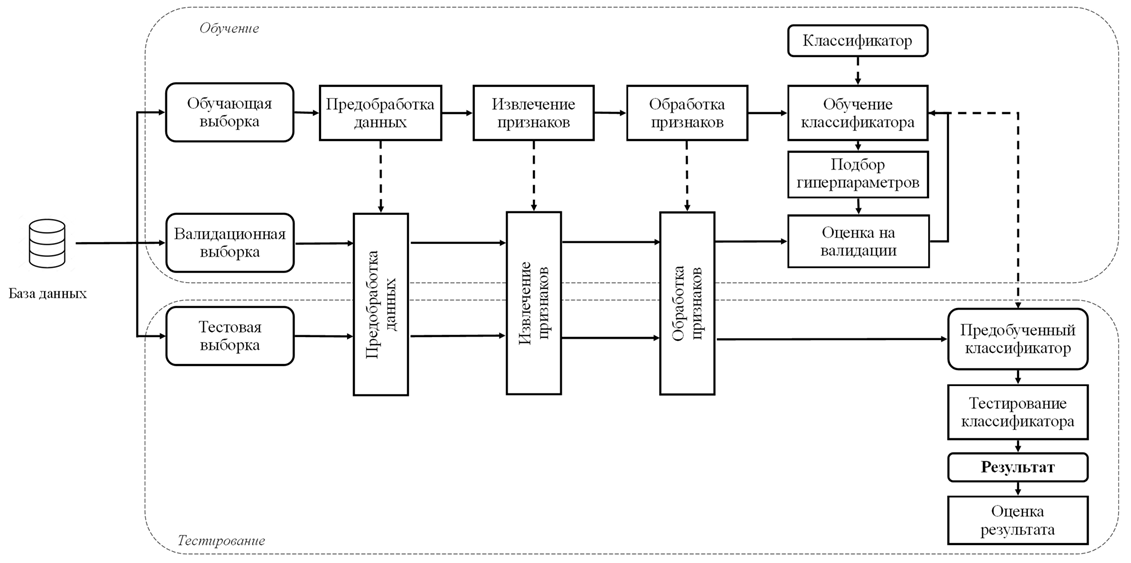

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np

# Мешок слов (Bag of Words, BoW)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
#корпус предобработанных текстов
Db = ['Вася любить кот',
      'Кот жить улица',
      'Кот любить рыба']

In [5]:
#векторизуем сразу весь корпус
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Db).toarray()
X

array([[1, 0, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 1, 1, 1, 0]])

In [12]:
vectorizer.get_feature_names_out()

array(['вася', 'жить', 'кот', 'любить', 'рыба', 'улица'], dtype=object)

In [6]:
#в предобученный векторизатор подаем новый текст
vectorizer.transform(['кот','собака']).toarray()

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# Сохранение предобученных моделей

In [7]:
import joblib

In [8]:
#сохранение предобученных моделей sklearn
joblib.dump(vectorizer, '/content/drive/MyDrive/BoW_pretrained.joblib')

['/content/drive/MyDrive/BoW_pretrained.joblib']

In [9]:
#загрузка предобученных моделей
BoW_pretrained = joblib.load('/content/drive/MyDrive/BoW_pretrained.joblib')

In [10]:
#проверка, что загруженная модель работает
BoW_pretrained.transform(['кот','собака']).toarray()

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Db = ['Вася любит кот',
      'Кот жить улица',
      'Кот любить рыба']

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Db).toarray()
X

array([[0.65249088, 0.        , 0.38537163, 0.65249088, 0.        ,
        0.        , 0.        ],
       [0.        , 0.65249088, 0.38537163, 0.        , 0.        ,
        0.        , 0.65249088],
       [0.        , 0.        , 0.38537163, 0.        , 0.65249088,
        0.65249088, 0.        ]])

# Word2Vec

In [13]:
#установка библиотеки
!pip install gensim > None

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
#принудительная перезагрузка среды выполнения. После перезагрузки нужно запускать только последующий код
import os
os.kill(os.getpid(), 9)

In [1]:
import gensim.downloader as api
import numpy as np

## Предобученный W2V

word2vec-ruscorpora-300 - word2vec обученный на Russian National Corpus (~ 250M слов), SkipGram с окном 10

В модели "word2vec-ruscorpora-300" после слова указывается часть речи: NOUN (существительное), ADJ (прилагательное) и так далее.

[Другие предобученные эмбеддинги gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)

In [2]:
#загрузка предобученную модель
wv = api.load('word2vec-ruscorpora-300')

[==================================================] 100.0% 198.8/198.8MB downloaded


In [3]:
#список слов в данной модели
list(wv.index_to_key)[:10]

['весь_DET',
 'человек_NOUN',
 'мочь_VERB',
 'год_NOUN',
 'сказать_VERB',
 'время_NOUN',
 'говорить_VERB',
 'становиться_VERB',
 'знать_VERB',
 'самый_DET']

In [ ]:
#объем словоря предобученной модели W2V
len(list(wv.index_to_key))

184973

In [5]:
#получение вектора w2v по слову
#print(wv['человек_NOUN'])
wv['человек_NOUN'].shape

(300,)

In [ ]:
#посмотреть ближайшие слова
wv.most_similar('человек_NOUN')

[('женщина_NOUN', 0.5500056743621826),
 ('мужчина_NOUN', 0.5161216855049133),
 ('человеческий_ADJ', 0.5005477666854858),
 ('идолопоклонствовать_VERB', 0.4838884770870209),
 ('высокопорядочный_ADJ', 0.4818764925003052),
 ('правдознатец_NOUN', 0.4815177917480469),
 ('некорыстолюбивый_ADJ', 0.4798555374145508),
 ('народ_NOUN', 0.477242112159729),
 ('старое::стариться_VERB', 0.47487741708755493),
 ('людишки_NOUN', 0.4739970564842224)]

In [ ]:
#посмотреть косинусную близость двух слов
wv.similarity('кошка_NOUN', 'собака_NOUN')

0.69631803

In [ ]:
#посмотреть косинусную близость двух слов
wv.similarity('кошка_NOUN', 'картошка_NOUN')

0.26303366

In [ ]:
# Аналогия: Франция = Париж + (Германия - Берлин)
wv.most_similar(positive=['париж_NOUN','германия_NOUN'], negative=['берлин_NOUN'], topn=1)

[('франция_NOUN', 0.8673800230026245)]

Как использовать W2V с частиречной разметкой с обычным текстом?

## Вариант 1 - убрать у W2V частиречную разметку

In [ ]:
#создание списка слов без частей речи
vocab = []
for w in list(wv.index_to_key):
  vocab.append(w.split('_')[0])

In [ ]:
#посмотреть первые 10 слов из полученного списка слов
vocab[:10]

['весь',
 'человек',
 'мочь',
 'год',
 'сказать',
 'время',
 'говорить',
 'становиться',
 'знать',
 'самый']

In [ ]:
#вектора каждого слова из предложения
preprocessing_text = ['кот', 'любить', 'тыгыдыкать']
vectors_word = []
for i in preprocessing_text:
  if i in vocab:
    #vocab.index(i) - находит идекс в vocab
    #list(wv.index_to_key)[vocab.index(i)] - выводит слово с его частью речи
    #wv[list(wv.index_to_key)[vocab.index(i)]] - получаем вектор
    vectors_word.append(wv[list(wv.index_to_key)[vocab.index(i)]])
  else:
    vectors_word.append(np.zeros(300))
vector_text = np.mean(vectors_word, axis = 0)

In [ ]:
#векторизация каждого слова по отдельности
print(vectors_word)

[array([-1.52633622e-01, -6.22178875e-02,  8.02985206e-02,  3.76203880e-02,
       -8.09977110e-03, -6.56392053e-02,  5.08799739e-02,  6.61313012e-02,
        1.57197528e-02,  9.78986733e-03,  4.73552682e-02, -2.55929027e-02,
        1.05717339e-01, -2.22761724e-02,  5.41505031e-02, -3.82993110e-02,
        5.26556484e-02,  1.17264939e-02, -1.46230776e-02, -1.95544884e-02,
        5.04205190e-02, -3.71097960e-02,  3.57442684e-02,  4.96631972e-02,
       -5.57994805e-02, -3.11674438e-02, -2.20739599e-02,  1.07113965e-01,
       -9.91705209e-02, -4.57583293e-02, -9.96095166e-02,  4.80931476e-02,
       -1.33494905e-03,  3.51430699e-02,  2.42795311e-02, -2.34595835e-02,
        5.17160492e-03, -2.06816625e-02,  4.38127927e-02, -3.31711844e-02,
       -2.07874626e-02,  6.72167316e-02, -7.74500072e-02,  2.93545369e-02,
       -1.46178985e-02,  4.10723649e-02,  8.69638026e-02, -3.46537703e-03,
        3.90354246e-02, -2.03978154e-03,  5.43198660e-02,  7.57279024e-02,
        1.48434611e-02, 

In [ ]:
#векторизация одного текста целиком
print(vector_text)

[-7.23793755e-02 -3.65346049e-03  1.49774142e-02  7.54638544e-03
 -1.19348569e-02 -2.31060667e-02  9.22187977e-03  9.52869281e-03
 -2.23265849e-02 -3.11003129e-03 -7.76530926e-03 -2.89029796e-02
  5.83873466e-02  2.21828558e-03  1.23262753e-02 -1.62550230e-02
  3.03303512e-02  1.29657254e-02 -3.85678171e-03 -1.78095748e-02
 -7.83780590e-03 -1.12617649e-02  1.16164486e-03  3.36692544e-02
 -2.79939914e-02 -2.76326823e-02 -1.60648624e-02  4.04443393e-02
 -3.67421086e-02 -6.21415352e-02 -3.01132913e-02  9.18867315e-03
  1.09648821e-02  4.99091111e-03  1.44553122e-02  1.99584290e-03
  4.19224147e-04 -1.34673944e-02  5.92786819e-03 -2.35241229e-02
  1.33819568e-02  1.89528183e-02 -3.25611023e-02 -3.45706878e-03
  3.19507591e-02  1.03188014e-02  1.94315246e-02 -1.94793034e-02
  2.81751975e-02 -3.38965377e-02 -1.26512274e-02  6.02087354e-02
  2.44842845e-02  2.13540588e-02 -2.02998444e-02  1.05534028e-03
 -3.11313610e-02 -1.36962188e-02 -7.87467708e-02  3.21254351e-03
  8.54042483e-03 -3.51230

In [ ]:
#размерность вектора для одного текста (любое кол-во слов) будет 300
vector_text.shape

(300,)

## Вариант 2 - Добавить частиречную разметку к тексту

In [6]:
import spacy

In [7]:
#загружаем модель для работы с русским языком
!python -m spacy download ru_core_news_sm >None

модели можно найти тут https://spacy.io/models/ru

In [8]:
# Загрузка модели
nlp = spacy.load("ru_core_news_sm")

In [9]:
#получаем объект doc который содержит инфу о токенизации, частиречной разметки, синтаксического анализа и извлечения сущностей
doc = nlp('кот любить тыгыдыкать')

In [10]:
#посмотрим токенизацию и частиречную разметку токенов
for token in doc:
    print(token.text, token.pos_)

кот NOUN
любить VERB
тыгыдыкать VERB


In [11]:
#преобразуем наш текст с частиречной разметкой
text_markup = [f'{token.text}_{token.pos_}' for token in doc]
print(text_markup)

['кот_NOUN', 'любить_VERB', 'тыгыдыкать_VERB']


In [12]:
#получим вектор W2М первого слова - кот
wv[text_markup[0]]

array([-1.52633622e-01, -6.22178875e-02,  8.02985206e-02,  3.76203880e-02,
       -8.09977110e-03, -6.56392053e-02,  5.08799739e-02,  6.61313012e-02,
        1.57197528e-02,  9.78986733e-03,  4.73552682e-02, -2.55929027e-02,
        1.05717339e-01, -2.22761724e-02,  5.41505031e-02, -3.82993110e-02,
        5.26556484e-02,  1.17264939e-02, -1.46230776e-02, -1.95544884e-02,
        5.04205190e-02, -3.71097960e-02,  3.57442684e-02,  4.96631972e-02,
       -5.57994805e-02, -3.11674438e-02, -2.20739599e-02,  1.07113965e-01,
       -9.91705209e-02, -4.57583293e-02, -9.96095166e-02,  4.80931476e-02,
       -1.33494905e-03,  3.51430699e-02,  2.42795311e-02, -2.34595835e-02,
        5.17160492e-03, -2.06816625e-02,  4.38127927e-02, -3.31711844e-02,
       -2.07874626e-02,  6.72167316e-02, -7.74500072e-02,  2.93545369e-02,
       -1.46178985e-02,  4.10723649e-02,  8.69638026e-02, -3.46537703e-03,
        3.90354246e-02, -2.03978154e-03,  5.43198660e-02,  7.57279024e-02,
        1.48434611e-02,  

In [ ]:
#получим вектор W2М последнего слова - тыгыдыкать
wv[text_markup[2]]

KeyError: "Key 'тыгыдыкать_VERB' not present"

In [14]:
#векторизация одного текста методом W2V
vectors_word = []
preprocessing_text = 'кот любить тыгыдыкать'
doc = nlp(preprocessing_text)
text_markup = [f'{token.text}_{token.pos_}' for token in doc]
for i in text_markup:
  if i in list(wv.index_to_key):
    vectors_word.append(wv[i])
  else:
    vectors_word.append(np.zeros(300))
vector_text = np.mean(vectors_word, axis = 0)

In [ ]:
#vector_text - вектор текста "кот любит тыгыдыкать"
vector_text.shape

(300,)

## Обучить W2V

In [17]:
!pip install pymorphy3 > None

In [18]:
import nltk
import nltk.tokenize
from string import punctuation
from gensim.models import Word2Vec
from pymorphy3 import MorphAnalyzer
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
corpus = ['кот любит мышей',
          'птицы летают на юг',
          'мыши любят сыр и боятся котов',
          'могут ли птицы и мыши дружить?',
          'некоторые коты боятся птиц, например ворон',
          'вороны любят сыр! может быть ворона - мышь',
          'солнечный день',
          'днем птицы, коты и мыши гуляют на улице']

In [21]:
#разбиваем на токены
punctuations = list(punctuation)
punkt = ['``','...',"''",'«','»','…','”','”','“','-','–','..']
punctuations.extend(punkt)
morph = MorphAnalyzer()


def prep_text(text, morph = morph, punctuations = punctuations):
    text_token = nltk.word_tokenize(text)
    text_word=[morph.parse(x.lower())[0].normal_form for x in text_token if x not in punctuations]
    return text_word

X_token = [prep_text(text) for text in corpus]

In [22]:
#предобработанный корпус
X_token

[['кот', 'любить', 'мышь'],
 ['птица', 'летать', 'на', 'юг'],
 ['мышь', 'любить', 'сыр', 'и', 'бояться', 'кот'],
 ['мочь', 'ли', 'птица', 'и', 'мышь', 'дружить'],
 ['некоторый', 'кот', 'бояться', 'птица', 'например', 'ворон'],
 ['ворона', 'любить', 'сыр', 'мочь', 'быть', 'ворона', 'мышь'],
 ['солнечный', 'день'],
 ['день', 'птица', 'кот', 'и', 'мышь', 'гулять', 'на', 'улица']]

In [30]:
#обучение модели Word2Vec
#кол-во эпох влияет на качество обучения
w2v_model = Word2Vec(sentences=X_token, vector_size=300, window=5, min_count=1, epochs=300)

In [31]:
vocab_size = len(w2v_model.wv.key_to_index)
print(f"Количество уникальных слов в словаре: {vocab_size}")
print(w2v_model.wv.key_to_index)

Количество уникальных слов в словаре: 22
{'мышь': 0, 'кот': 1, 'птица': 2, 'любить': 3, 'и': 4, 'бояться': 5, 'на': 6, 'сыр': 7, 'мочь': 8, 'ворона': 9, 'день': 10, 'дружить': 11, 'ли': 12, 'гулять': 13, 'некоторый': 14, 'например': 15, 'ворон': 16, 'юг': 17, 'летать': 18, 'быть': 19, 'солнечный': 20, 'улица': 21}


In [32]:
#получаем вектор слова
w2v_model.wv['кот']

array([-2.1148380e-03,  4.2039035e-03, -1.3416180e-04, -9.8789053e-04,
        4.2463711e-04, -2.5247240e-03,  1.7825308e-03,  4.0539484e-03,
        1.4309428e-03, -3.3929320e-03,  4.9972013e-03,  4.0242294e-04,
        6.7650812e-04, -5.4350350e-04,  2.0530245e-03, -2.4939498e-03,
        4.4550039e-03, -1.6654634e-03, -2.5021788e-03,  2.0305952e-03,
        8.0895465e-04, -1.4488455e-03,  3.8835476e-03,  4.5910412e-03,
       -4.2848722e-03, -1.8323005e-04,  1.1686478e-03,  1.3638982e-03,
        4.7635977e-04, -1.5732314e-03,  1.1414179e-03, -2.3777743e-03,
       -3.7292539e-04, -1.2945401e-03,  1.3134262e-03,  1.9386509e-03,
        3.4194840e-03, -2.6766453e-03, -3.4365652e-03,  3.0410518e-03,
        2.1676125e-05,  1.2055533e-03,  3.0675295e-03, -1.4626076e-03,
        2.1074805e-03,  9.3055947e-04,  8.6552254e-04, -1.2929395e-03,
       -9.5233403e-04,  1.4325378e-04,  1.1318906e-03, -3.8145579e-05,
       -4.5359144e-03, -2.4838168e-03, -1.3464352e-03, -3.4890705e-04,
      

In [33]:
#посмотреть ближайшие слова
w2v_model.wv.most_similar('кот')

[('птица', 0.4229794144630432),
 ('мышь', 0.3587675094604492),
 ('гулять', 0.3417969346046448),
 ('мочь', 0.30903661251068115),
 ('и', 0.3019723892211914),
 ('день', 0.2887600362300873),
 ('например', 0.2844282388687134),
 ('ли', 0.2627837359905243),
 ('бояться', 0.2537650167942047),
 ('ворона', 0.23934033513069153)]

In [34]:
#посмотреть косинусную близость двух слов
w2v_model.wv.similarity('кот', 'мышь')

0.3587675

In [35]:
#посмотреть косинусную близость двух слов
w2v_model.wv.similarity('кот', 'солнечный')

0.1510926

Далее необходимо векторизовать корпус текстов с помощью обученной модели. Код векторизации аналогичен как при использовании предобученных моделей

## сохранение предобученной модели Word2Vec из gensim

In [ ]:
#сохранить предобученную вашу модель W2V
w2v_model.save('/content/drive/MyDrive/W2V_pretrained.bin')

In [ ]:
#загрузить предобученную модель W2V
loaded_model = Word2Vec.load('/content/drive/MyDrive/W2V_pretrained.bin')

In [ ]:
#проверим что все работает и попробуем векторизовать слово
loaded_model.wv['кот']

array([-2.1148380e-03,  4.2039035e-03, -1.3416180e-04, -9.8789053e-04,
        4.2463711e-04, -2.5247240e-03,  1.7825308e-03,  4.0539484e-03,
        1.4309428e-03, -3.3929320e-03,  4.9972013e-03,  4.0242294e-04,
        6.7650812e-04, -5.4350350e-04,  2.0530245e-03, -2.4939498e-03,
        4.4550039e-03, -1.6654634e-03, -2.5021788e-03,  2.0305952e-03,
        8.0895465e-04, -1.4488455e-03,  3.8835476e-03,  4.5910412e-03,
       -4.2848722e-03, -1.8323005e-04,  1.1686478e-03,  1.3638982e-03,
        4.7635977e-04, -1.5732314e-03,  1.1414179e-03, -2.3777743e-03,
       -3.7292539e-04, -1.2945401e-03,  1.3134262e-03,  1.9386509e-03,
        3.4194840e-03, -2.6766453e-03, -3.4365652e-03,  3.0410518e-03,
        2.1676125e-05,  1.2055533e-03,  3.0675295e-03, -1.4626076e-03,
        2.1074805e-03,  9.3055947e-04,  8.6552254e-04, -1.2929395e-03,
       -9.5233403e-04,  1.4325378e-04,  1.1318906e-03, -3.8145579e-05,
       -4.5359144e-03, -2.4838168e-03, -1.3464352e-03, -3.4890705e-04,
      

# BERT

In [36]:
from transformers import BertTokenizer, BertModel
import torch

In [37]:
# Инициализация токенизатора и модели
#используется мультиязычная модель, т.к. на включает в том числе и русский язык
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

In [38]:
#посмотрим отдельно как происходит токенизация
tokens = tokenizer.tokenize('кот любит тыгыдыкать.')
print(tokens)

['ко', '##т', 'л', '##ю', '##бит', 'ты', '##гы', '##дык', '##ать', '.']


In [40]:
# Пример текста на русском языке
texts = [
    'кот любит мышей',
    'птицы летают на юг',
    'коты любят тыгыдыкать'
]

In [41]:
# Векторизация текста
def get_text_vector(text, type = 'cls'):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    # Получаем вектор CLS токена
    if type == 'cls':
      cls_vector = outputs.last_hidden_state[0, 0, :].numpy()
      return cls_vector
    #другой вариант
    # Вычисляем среднее значение всех токенов по последней скрытой активации
    elif type == 'mean':
      mean_pooling = outputs.last_hidden_state.mean(dim=1)[0]
      return mean_pooling

In [42]:
# Получение векторов
for text in texts:
    vector = get_text_vector(text, type = 'cls')
    print(f"Размер вектора  текста: '{text}'\n{vector.shape}\n")
    print(f"Вектор для текста: '{text}'\n{vector}\n")

Размер вектора  текста: 'кот любит мышей'
(768,)

Вектор для текста: 'кот любит мышей'
[-1.37014896e-01 -8.00623149e-02  6.14902258e-01  2.28503555e-01
  3.62713307e-01 -7.39555433e-02  1.03374552e-02 -7.12282881e-02
  6.41911253e-02  1.86232433e-01  3.73502076e-01 -6.86442256e-02
  1.47607118e-01  3.24297622e-02 -9.33325052e-01 -1.35031596e-01
  7.14263916e-02  4.00312692e-01 -3.16995825e-03  1.50802702e-01
  3.46922427e-01 -3.08660548e-02 -1.59899965e-01 -7.10832179e-02
  1.57326624e-01 -3.22818488e-01 -3.24684620e-01  7.82690495e-02
  3.50304574e-01  2.57902801e-01  3.66466194e-01 -1.80741727e-01
  1.76084876e-01  1.39888087e-02  7.46506825e-02  1.79676935e-01
 -1.90232885e+00 -2.41087049e-01 -1.37216404e-01 -4.62440923e-02
 -4.01147485e-01  2.16945857e-01  7.19927102e-02  7.05852881e-02
 -4.53183763e-02  1.17018700e+00 -1.95219219e-01  1.16087571e-01
  1.40731955e+00 -5.80027819e-01  2.72459120e-01 -4.05383110e-01
 -3.15233432e-02 -1.52278864e+00  1.76017672e-01  9.40189511e-02
  1